<a href="https://colab.research.google.com/github/guzmanjs/MCD/blob/main/Semestre%201/Gestion%20Estrategica/Clasificacion/tarea_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Proyecto de aprendizaje surpervisado: Clasificación

Integrantes:

- Luisa F. Giraldo
- Juan S. Guzmán

Con este proyecto aprenderemos como construir, entrenar y evaluar un modelo que resuelva una tarea de clasificación. Utilizaremos diversas librerías para la manipulación, análisis, visualización, modelado y evaluación de los datos.

## 1. Librerías

In [ ]:
# Importar librerías

# Manejo de analísis de datos a través de dataframes (data tabular)
import pandas as pd
# Manipulación de arreglos y análisis numérico
import numpy as np
# Visualización de datos
import seaborn as sns
# Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 2.Diccionaro de datos

1. country / city
2. age
3. sex
4. chest pain type (4 values)
5. resting blood pressure
6. serum cholestoral in mg/dl
7. fasting blood sugar > 120 mg/dl
8. resting electrocardiographic results (values 0,1,2)
9. maximum heart rate achieved
10. exercise induced angina
11. oldpeak = ST depression induced by exercise relative to rest
12. the slope of the peak exercise ST segment
13. number of major vessels (0-3) colored by flourosopy
14. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
15. target

## 3. Lectura de los datos

In [ ]:
df = pd.read_csv(r'DatosCorazon.csv', sep=';', names=['location', 'age', 'sex', 'chestpain_type', 'resting_blood_pressure', 'cholesterol',
                                                      'blood_sugar', 'ekg','max_bpm', 'angina', 'oldpeak', 'peak_slope', 'n_vessels', 'thal', 'target',])
# Mover la columna 'target' a la primera posición
cols = ['target'] + [col for col in df if col != 'target']
df = df[cols]

df

,target,location,age,sex,chestpain_type,resting_blood_pressure,cholesterol,blood_sugar,ekg,max_bpm,angina,oldpeak,peak_slope,n_vessels,thal
0,0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6
1,2,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3
2,1,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7
3,0,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3
4,0,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,Suiza,70.0,1,4,115,0,0,1,92,1,0,2,?,7
716,3,Suiza,70.0,1,4,140,0,1,0,157,1,2,2,?,7
717,0,Suiza,72.0,1,3,160,0,?,2,114,0,1.6,2,2,?
718,1,Suiza,73.0,0,3,160,0,0,1,121,0,0,1,?,3


## 4. Análisis Exploratorio de Datos

- Limpieza de datos
- Exploración de datos
- Ingeniería de datos

### 4.1. Limpieza de los datos

Identificamos tipos de datos y datos faltantes o nulos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   target                  720 non-null    int64  
 1   location                720 non-null    object 
 2   age                     720 non-null    float64
 3   sex                     720 non-null    int64  
 4   chestpain_type          720 non-null    int64  
 5   resting_blood_pressure  720 non-null    object 
 6   cholesterol             720 non-null    object 
 7   blood_sugar             720 non-null    object 
 8   ekg                     720 non-null    object 
 9   max_bpm                 720 non-null    object 
 10  angina                  720 non-null    object 
 11  oldpeak                 720 non-null    object 
 12  peak_slope              720 non-null    object 
 13  n_vessels               720 non-null    object 
 14  thal                    720 non-null    ob

In [ ]:
df.isnull().sum()

target                    0
location                  0
age                       0
sex                       0
chestpain_type            0
resting_blood_pressure    0
cholesterol               0
blood_sugar               0
ekg                       0
max_bpm                   0
angina                    0
oldpeak                   0
peak_slope                0
n_vessels                 0
thal                      0
dtype: int64

Como vemos no existen datos faltantes, pero debemos revisar si existen entradas con datos erróneos o no esperados para la variable.

In [ ]:
df.head()

,target,location,age,sex,chestpain_type,resting_blood_pressure,cholesterol,blood_sugar,ekg,max_bpm,angina,oldpeak,peak_slope,n_vessels,thal
0,0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6
1,2,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3
2,1,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7
3,0,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3
4,0,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3


In [ ]:
df.tail()

,target,location,age,sex,chestpain_type,resting_blood_pressure,cholesterol,blood_sugar,ekg,max_bpm,angina,oldpeak,peak_slope,n_vessels,thal
715,1,Suiza,70.0,1,4,115,0,0,1,92,1,0,2,?,7
716,3,Suiza,70.0,1,4,140,0,1,0,157,1,2,2,?,7
717,0,Suiza,72.0,1,3,160,0,?,2,114,0,1.6,2,2,?
718,1,Suiza,73.0,0,3,160,0,0,1,121,0,0,1,?,3
719,1,Suiza,74.0,1,2,145,0,?,1,123,0,1.3,1,?,?


Como lo intuimos anteriormente, existen entradas no esperadas para las distintas variables registrando '?', por lo que debemos asegurarnos en cuántas variables estos sucede y cuántas veces por cada una.

In [ ]:
for var in df.select_dtypes(include=['object']).columns:
    cantidad = df[df[var] == '?'][var].count()
    print(f"Existen {cantidad} valores en {var} con el valor ?")

Existen 0 valores en location con el valor ?
Existen 3 valores en resting_blood_pressure con el valor ?
Existen 23 valores en cholesterol con el valor ?
Existen 83 valores en blood_sugar con el valor ?
Existen 2 valores en ekg con el valor ?
Existen 2 valores en max_bpm con el valor ?
Existen 2 valores en angina con el valor ?
Existen 6 valores en oldpeak con el valor ?
Existen 207 valores en peak_slope con el valor ?
Existen 413 valores en n_vessels con el valor ?
Existen 320 valores en thal con el valor ?


Como vemos, varias variables que en su naturaleza son numéricas presentan registros con '?'. Vemos que las variables 'peak_slope', 'n_vessel,'thal'  presentan los mayores registros erroneos; sin embargo, al ser datos usados para la predicción de casos médicos, se decide eliminar las variables y no hacer imputaciones de tan alto número de lineas.

In [ ]:
df = df.drop(columns=['n_vessels', 'thal'])

Revisamos nuevamente, entradas no esperadas para las distintas variables registrando '?'

In [ ]:
for var in df.select_dtypes(include=['object']).columns:
    cantidad = df[df[var] == '?'][var].count()
    print(f"Existen {cantidad} valores en {var} con el valor ?")

Existen 0 valores en location con el valor ?
Existen 3 valores en resting_blood_pressure con el valor ?
Existen 23 valores en cholesterol con el valor ?
Existen 83 valores en blood_sugar con el valor ?
Existen 2 valores en ekg con el valor ?
Existen 2 valores en max_bpm con el valor ?
Existen 2 valores en angina con el valor ?
Existen 6 valores en oldpeak con el valor ?
Existen 207 valores en peak_slope con el valor ?


Definimos un Transformer personalizado que nos cambia los valores ? por nulos

In [ ]:
def convert(df,columns,val):
    result = df.copy()
    for col in columns:
        result[col] = result[col].astype(val)
    return result

In [ ]:
# Creamos un Transformer personalizado que nos cambia los valores ? por nulos
# Igualmente nos modifica los tipos de variables errados
from sklearn.base import BaseEstimator, TransformerMixin
class Format_variables(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.replace('?',np.nan)
        result = convert(result,['resting_blood_pressure','cholesterol','blood_sugar',
            'ekg','max_bpm','angina','oldpeak','peak_slope'],'float64')
        return result

In [ ]:
df = Format_variables().fit_transform(df)

In [ ]:
# Verificamos que los tipos de datos son los correctos
# Asimismo nos damos cuenta que ahora sí tenemos datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   target                  720 non-null    int64  
 1   location                720 non-null    object 
 2   age                     720 non-null    float64
 3   sex                     720 non-null    int64  
 4   chestpain_type          720 non-null    int64  
 5   resting_blood_pressure  717 non-null    float64
 6   cholesterol             697 non-null    float64
 7   blood_sugar             637 non-null    float64
 8   ekg                     718 non-null    float64
 9   max_bpm                 718 non-null    float64
 10  angina                  718 non-null    float64
 11  oldpeak                 714 non-null    float64
 12  peak_slope              513 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 73.2+ KB


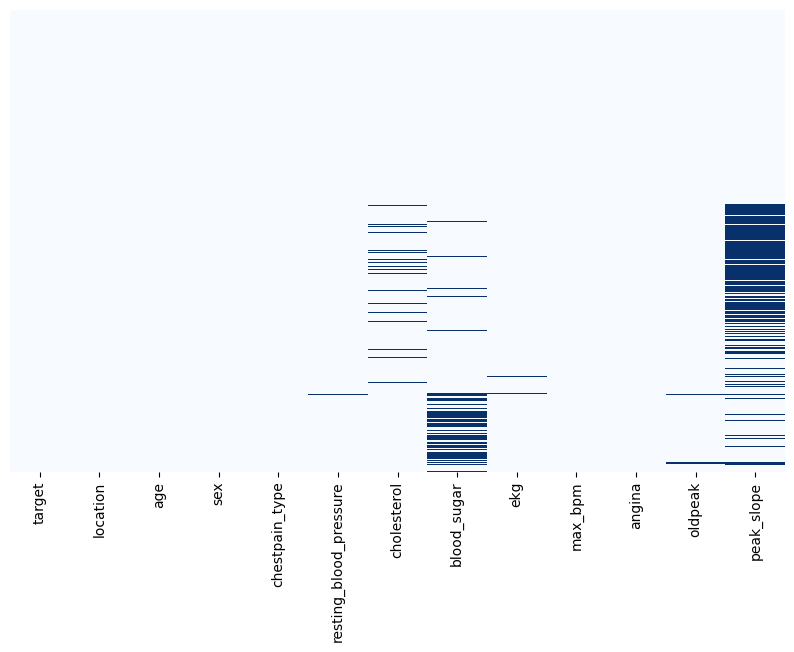

In [ ]:
# Dibujamos un mapa de calor para vislumbrar la ubicación de los valores faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

Antes de meternos la limpieza de datos debemos ver como están distribuidas las categorías de la clase objetivo symboling. Es importante conocer si nuestro conjunto de datos se encuentra balanceado o no.

<Axes: xlabel='target', ylabel='count'>

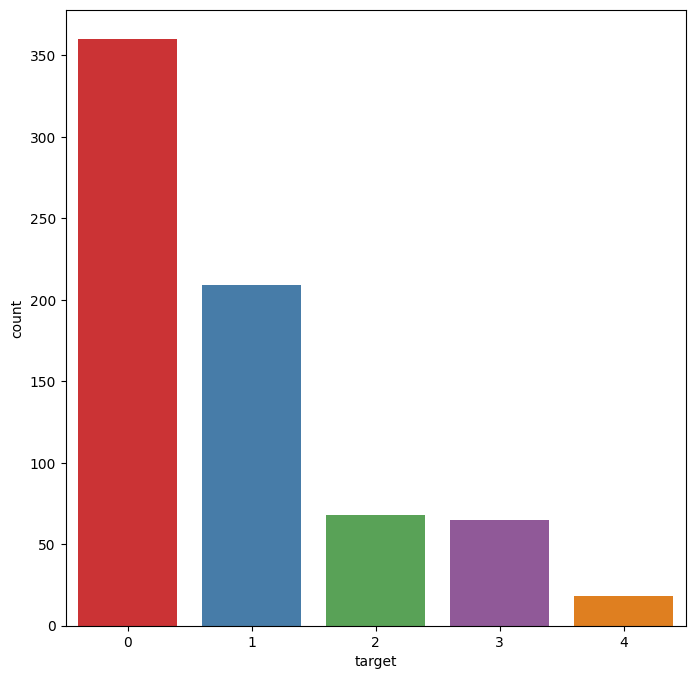

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="target", data=df, palette = "Set1")

Previo a la inputación de datos, revisamos histogramas de los registros de cada variable, con el fin de visualizar el comportamiento de los datos y qué rango de valores toman, esto nos permitirá también la identificación de variables binarias.

In [ ]:
# Función para graficar histogramas
def histograma_visual(data):
    cont_vars = list(data.select_dtypes('number').columns)
    plt.figure(figsize=(15, 40))
    i = 0
    val = int(len(cont_vars)/2) + 1
    for col in cont_vars:

        i += 1
        plt.subplot(val, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))

    plt.show()

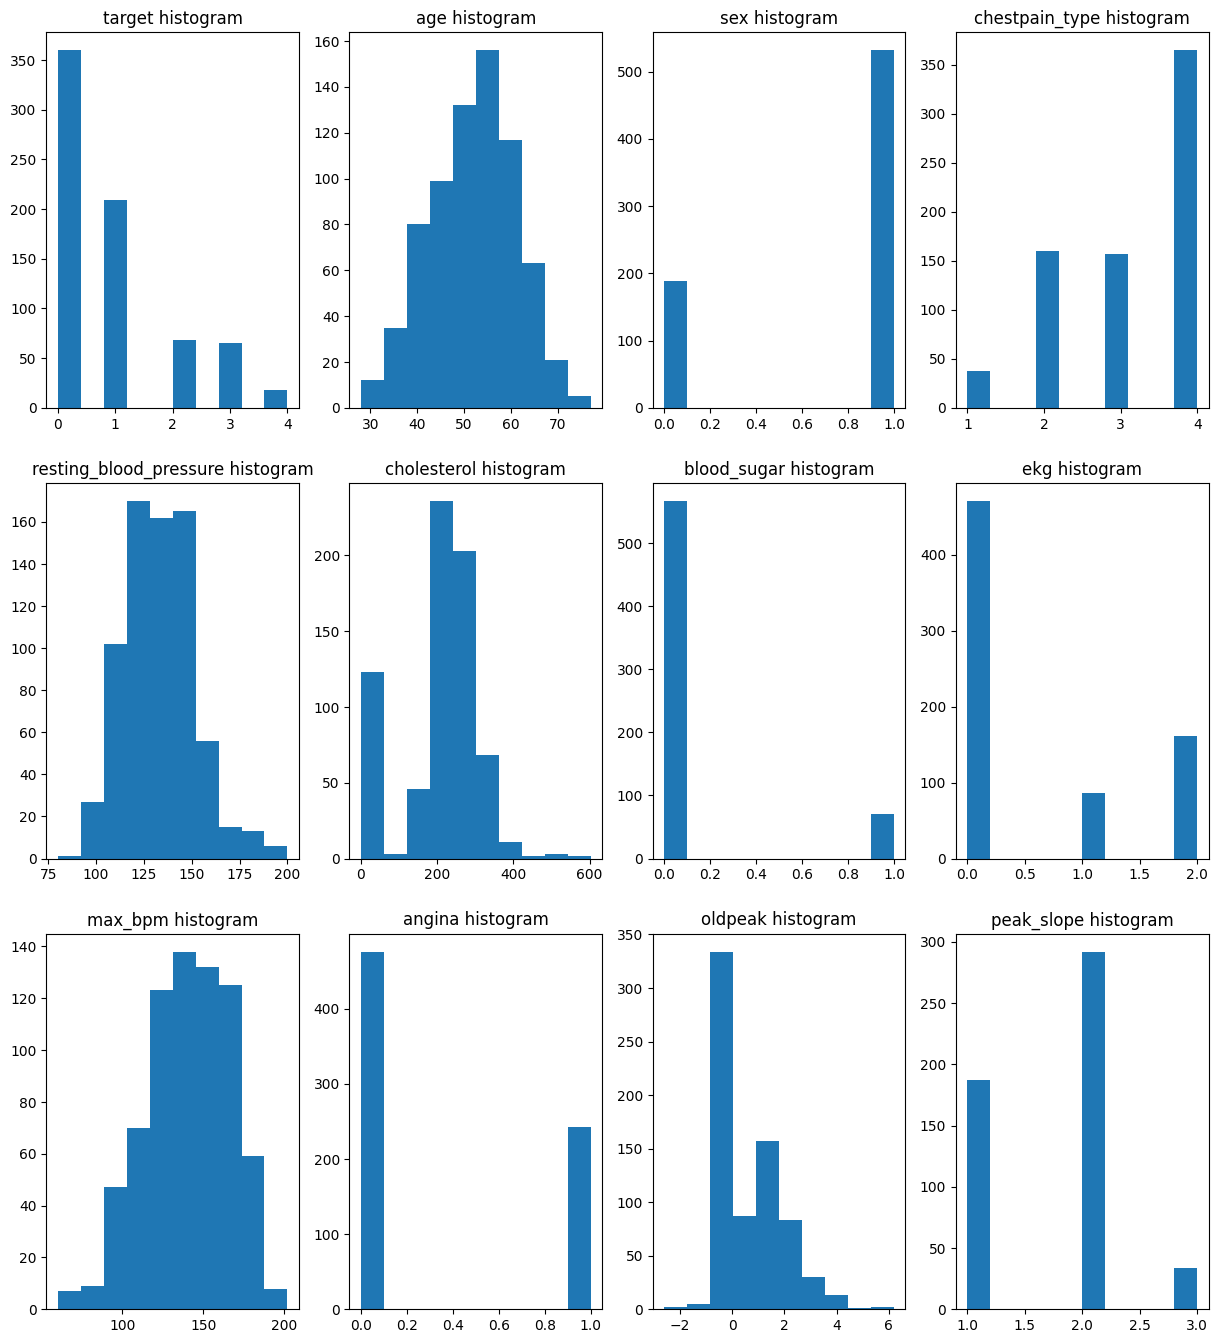

In [ ]:
histograma_visual(df)

Como podemos deducir de la información graficada en los histogramas,y tomando la información del diccionario de datos, se concluye que las siguientes variables son categóricas; <br>

*   blood_sugar: Toma valores "0" y "1"<br>
*   sex: Toma valores  "0" y "1"<br>
*   Chestpain: Toma valores "1", "2", "3" ó "4"<br>
*   angina: Toma valores de "0" ó "1"<br>
*   peak_slope: Toma valores   "1", "2" ó "3" <br>
*   egk: Toma valores   "0", "1" ó "2" <br>








A continuación, se define un transformador para la imputación de datos, utilizando la media para las columnas numéricas y la moda para las variables categóricas previamente identificadas.

Es importante destacar que esta imputación se realiza con fines académicos. En el contexto de datos médicos, en una aplicación práctica, es crucial contar con la evaluación y el aval de un experto médico para asegurar la validez y precisión de los transformadores utilizados en la imputación.

In [ ]:
# Creamos un Transformer personalizado que nos imputa los valores faltantes
# Utiliza la media para columnas numéricas y la moda para las categóricas
class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self, cont, cat):
        self.cont = cont
        self.cat = cat

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        for c in self.cont:
            avg = result[c].mean(axis=0)
            result[c].replace(np.nan,avg,inplace=True)
        for c in self.cat:
            mode = result[c].value_counts().idxmax()
            result[c].replace(np.nan,mode,inplace=True)
        return result

In [ ]:
cont = ['resting_blood_pressure', 'cholesterol', 'max_bpm',  'oldpeak']

cat =  ['blood_sugar', 'angina', 'peak_slope', 'ekg']

df = Imputer(cont,cat).fit_transform(df)


In [ ]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   target                  720 non-null    int64  
 1   location                720 non-null    object 
 2   age                     720 non-null    float64
 3   sex                     720 non-null    int64  
 4   chestpain_type          720 non-null    int64  
 5   resting_blood_pressure  720 non-null    float64
 6   cholesterol             720 non-null    float64
 7   blood_sugar             720 non-null    float64
 8   ekg                     720 non-null    float64
 9   max_bpm                 720 non-null    float64
 10  angina                  720 non-null    float64
 11  oldpeak                 720 non-null    float64
 12  peak_slope              720 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 73.2+ KB


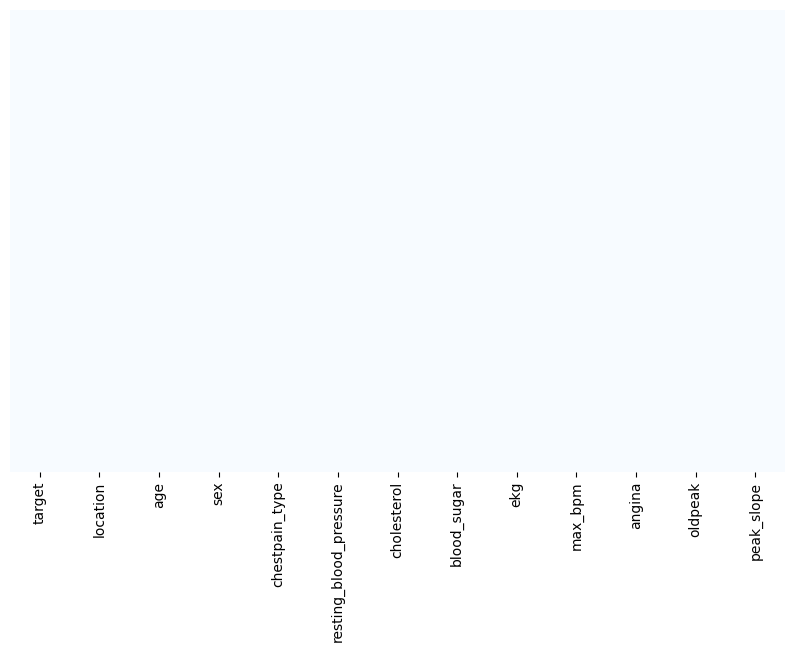

In [ ]:
# Dibujamos un mapa de calor para vislumbrar la ubicación de los valores faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

Observamos que ya no contamos con valores faltantes.

### Valores atípicos
Visualizamos utilizando
- Diagramas de cajas y bigotes
- Histogramas

In [ ]:
# Función para graficar los valores continuos del dataframe
def outliers_visual(data):
    cont_vars = list(data.select_dtypes('number').columns)
    plt.figure(figsize=(15, 40))
    i = 0
    val = int(len(cont_vars)/2) + 1
    for col in cont_vars:
        i += 1
        plt.subplot(val, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(val, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))

    plt.show()

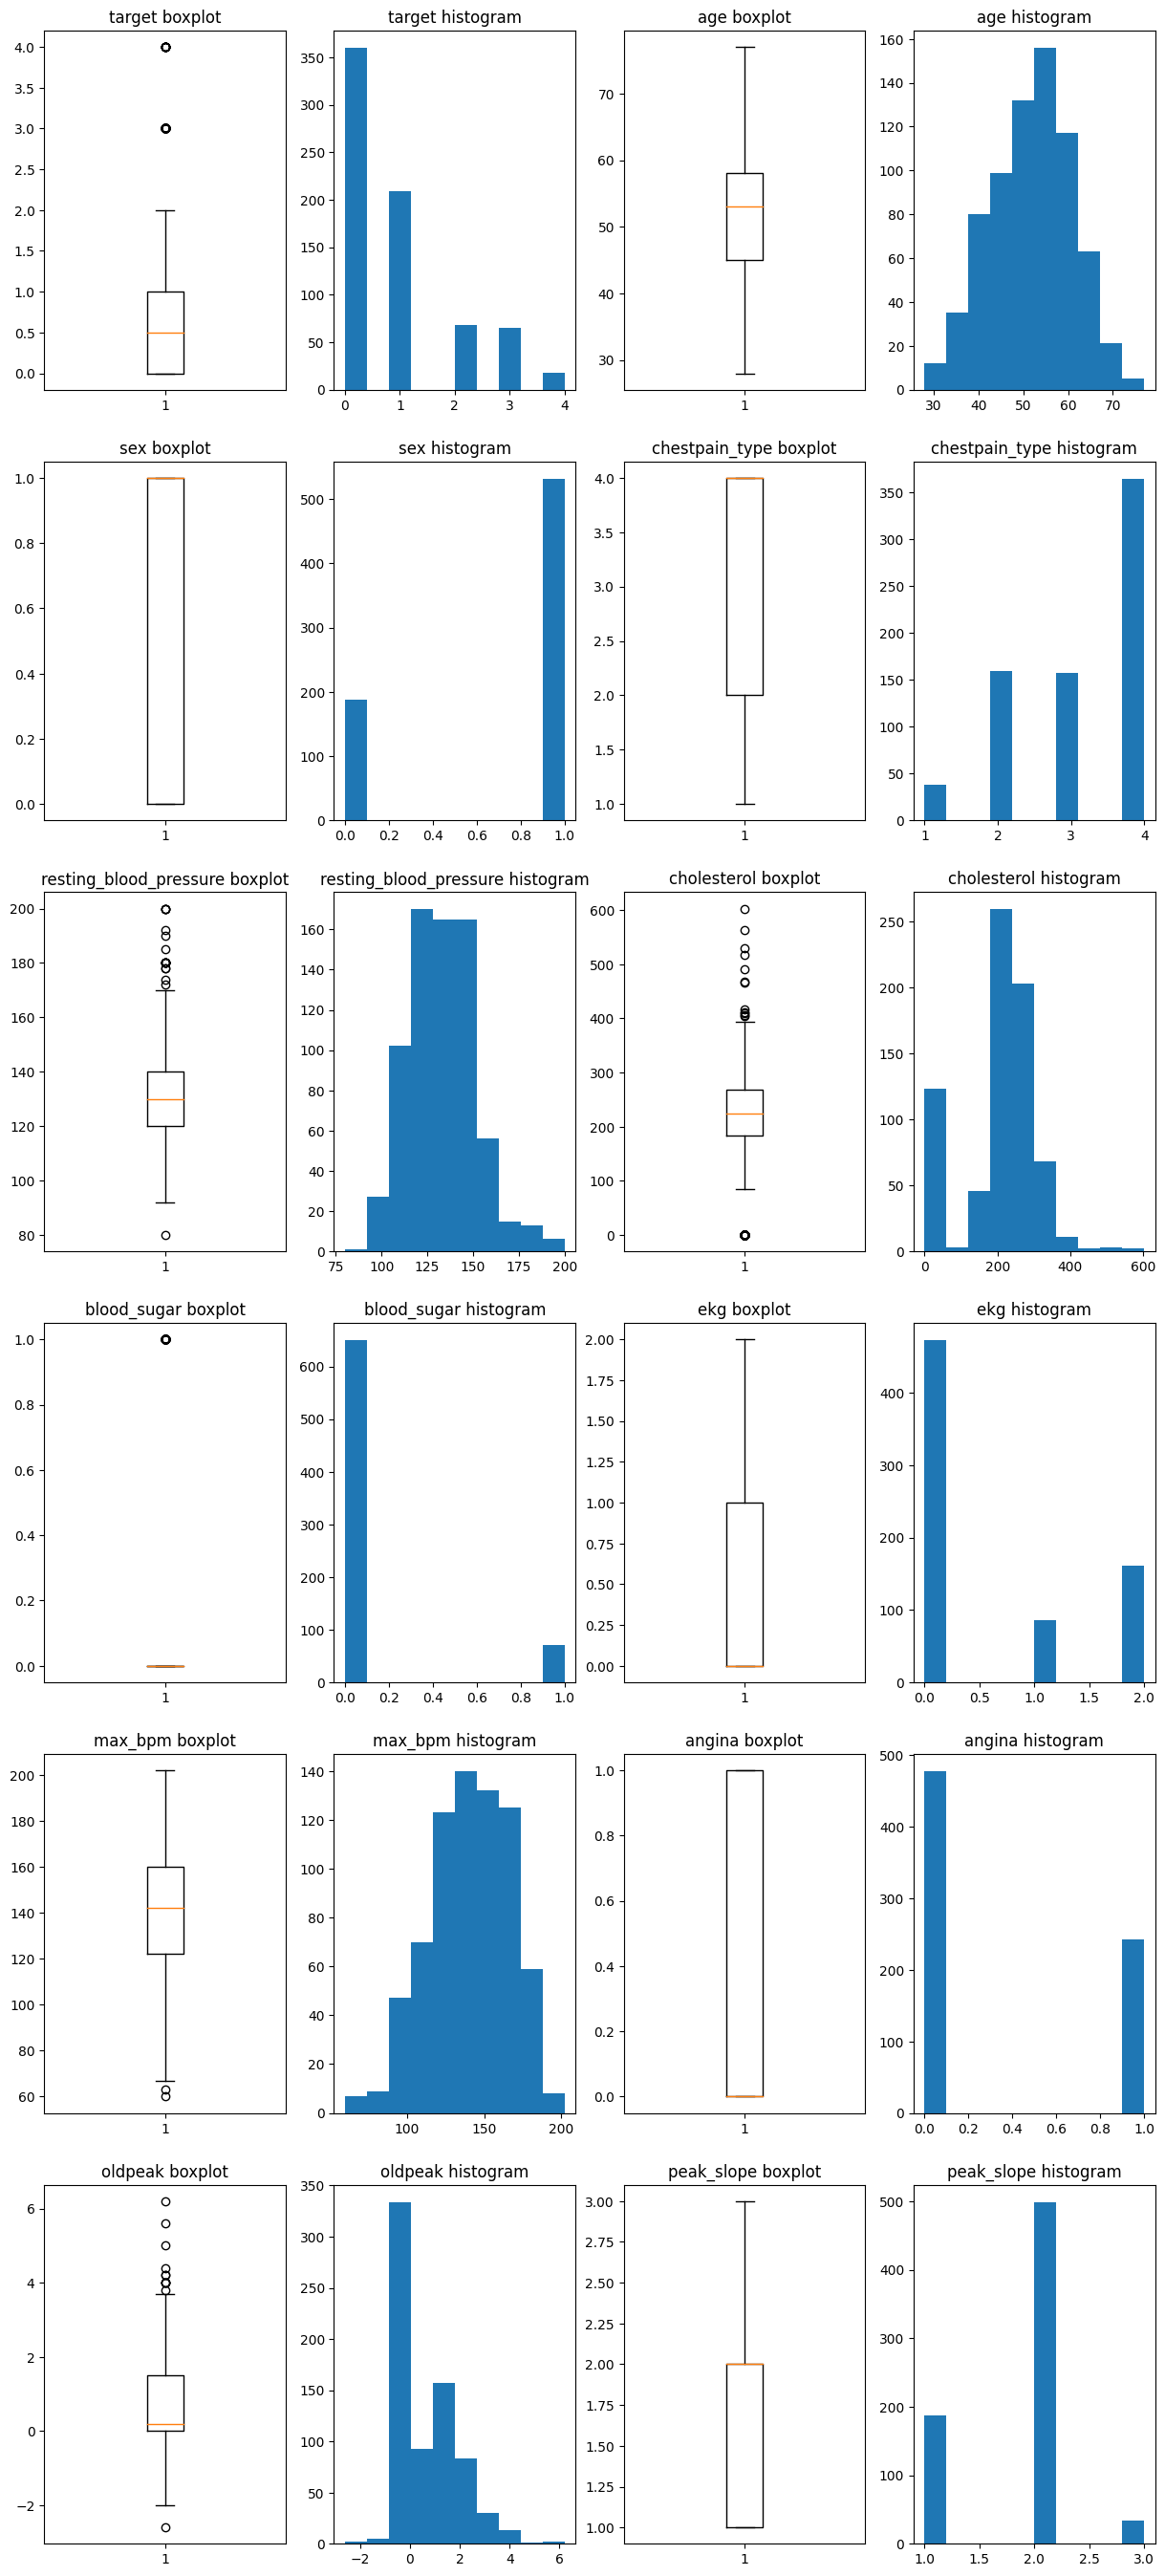

In [ ]:
outliers_visual(df)

Utilizando los gráficos anteriores podemos observar las distribuciones para cada variable continua.

Visualmente resulta claro que existen outliers para algunas de las variables dentro del dataset:



*   resting_blood_pressure
*   cholesterol
*   max_bpm
*   oldpeak

<br>
Podemos corroborar lo anterior de manera estadística haciendo uso del método de Tukey (se consideran como datos atípicos aquellos que están 1.5 veces por fuera del rango intercuartil)

In [ ]:
# Función para calcular los datos atípicos utilizando el método de Tukey
def outlier_count(col, data):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
    return outlier_count

In [ ]:
# Guardar las columnas de tipo continuas con datos atípicos
cont_vars = []
for col in list(df.select_dtypes('number').columns):
    if outlier_count(col, df) > 0:
        cont_vars.append(col)

---------------target---------------
Number of outliers: 83
Percent of data that is outlier: 11.53%
---------------age---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------sex---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------chestpain_type---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------resting_blood_pressure---------------
Number of outliers: 22
Percent of data that is outlier: 3.06%
---------------cholesterol---------------
Number of outliers: 135
Percent of data that is outlier: 18.75%
---------------blood_sugar---------------
Number of outliers: 70
Percent of data that is outlier: 9.72%
---------------ekg---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------max_bpm---------------
Number of outliers: 2
Percent of data that is outlier: 0.28%
---------------angina---------------
Number of outliers: 0
Percent of data that is outlie

 Limitaremos a través de winsorizing

In [ ]:
from scipy.stats.mstats import winsorize

wins_dict = {}

def test_wins(col, df, wins_dict, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()
    return wins_dict

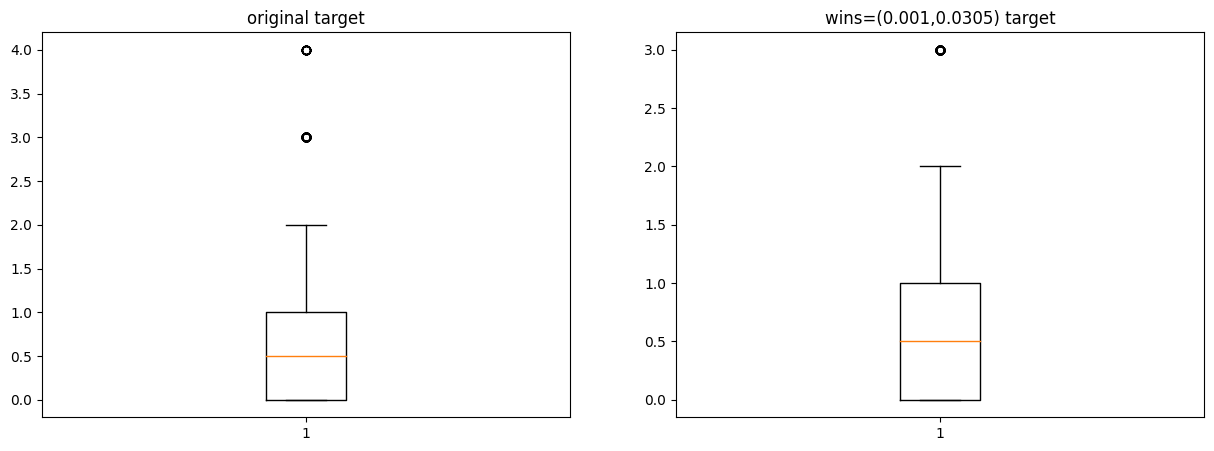

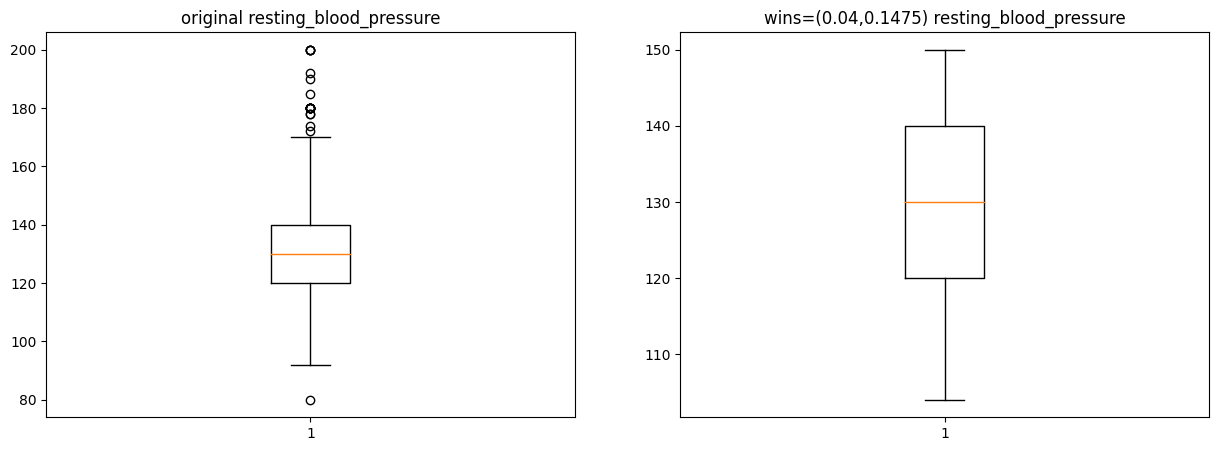

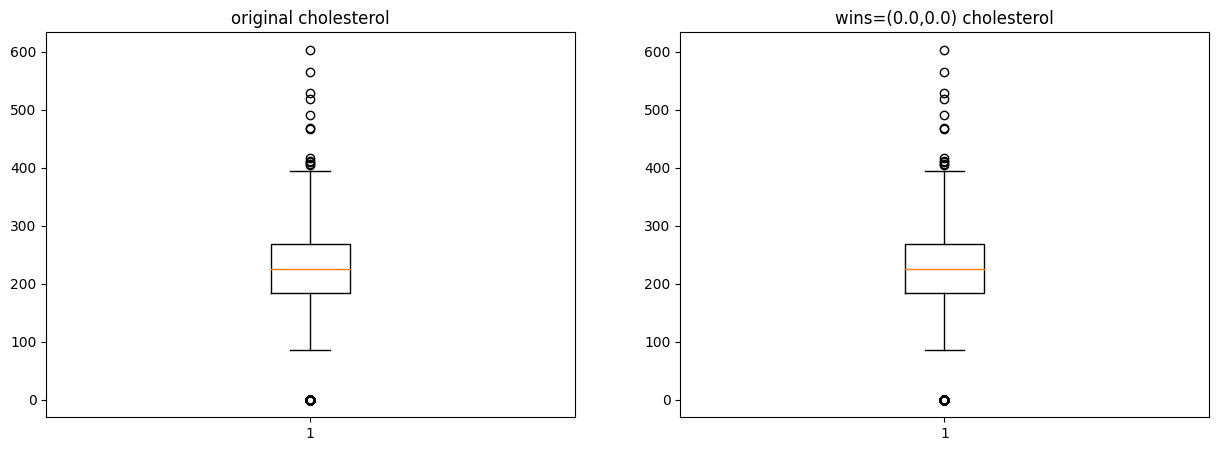

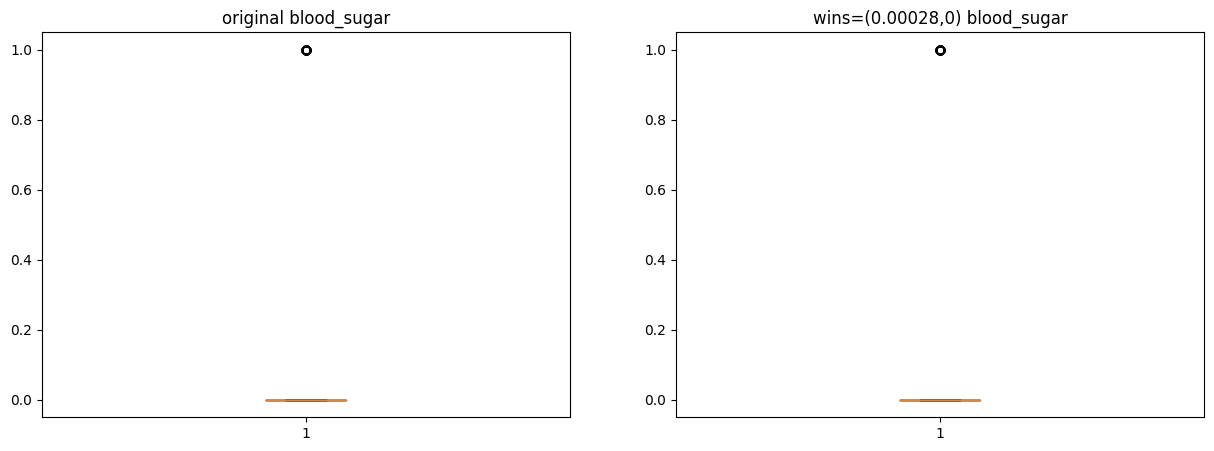

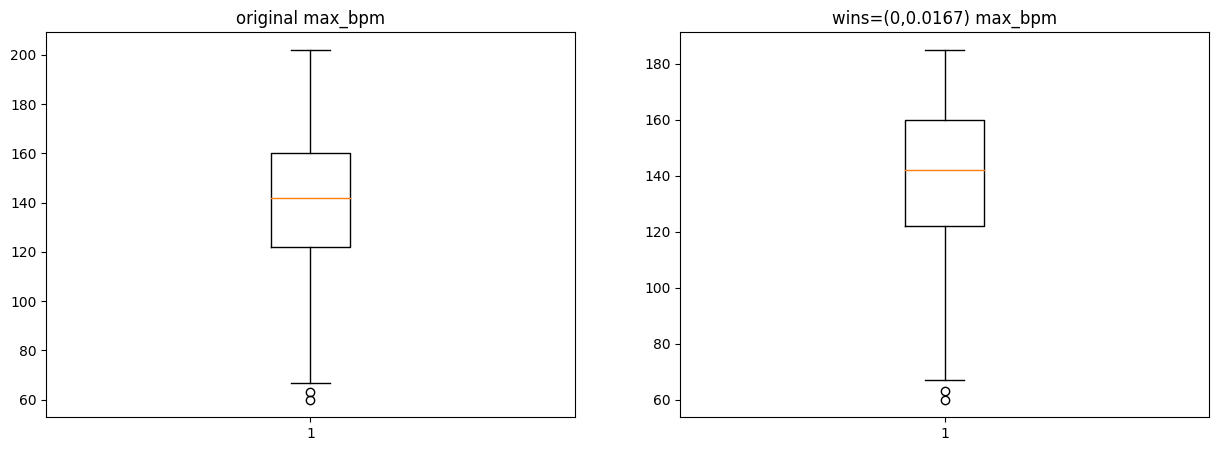

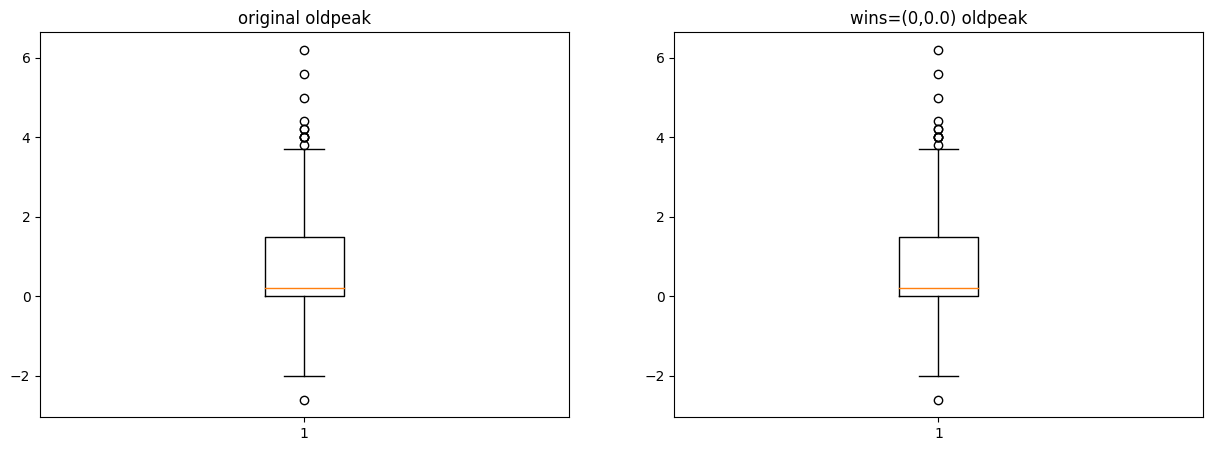

In [ ]:

# Verificación de la Winsorizing
wins_dict = {}

wins_dict = test_wins(cont_vars[0], df, wins_dict, lower_limit=.001, upper_limit=.0305, show_plot=True) #resting_blood_pressure
wins_dict = test_wins(cont_vars[1], df, wins_dict, lower_limit=.04, upper_limit=.1475, show_plot=True) #cholesterol
wins_dict = test_wins(cont_vars[2], df, wins_dict, lower_limit=.000, upper_limit=.00, show_plot=True) #blood_sugar no se considera outlier
wins_dict = test_wins(cont_vars[3], df, wins_dict, lower_limit=.00028, show_plot=True) # max_bpm
wins_dict = test_wins(cont_vars[4], df, wins_dict, upper_limit=.0167, show_plot=True) #oldpeak
wins_dict = test_wins(cont_vars[5], df, wins_dict, upper_limit=.00, show_plot=True) #target?? 11.53%


In [ ]:
# Creamos un Transformer personalizado para limitar los outliers con el winsorizing
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, wins, cont_vars):
        self.wins = wins
        self.cont_vars = cont_vars

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        for col in cont_vars:
            result[col] = self.wins[col]
        return result

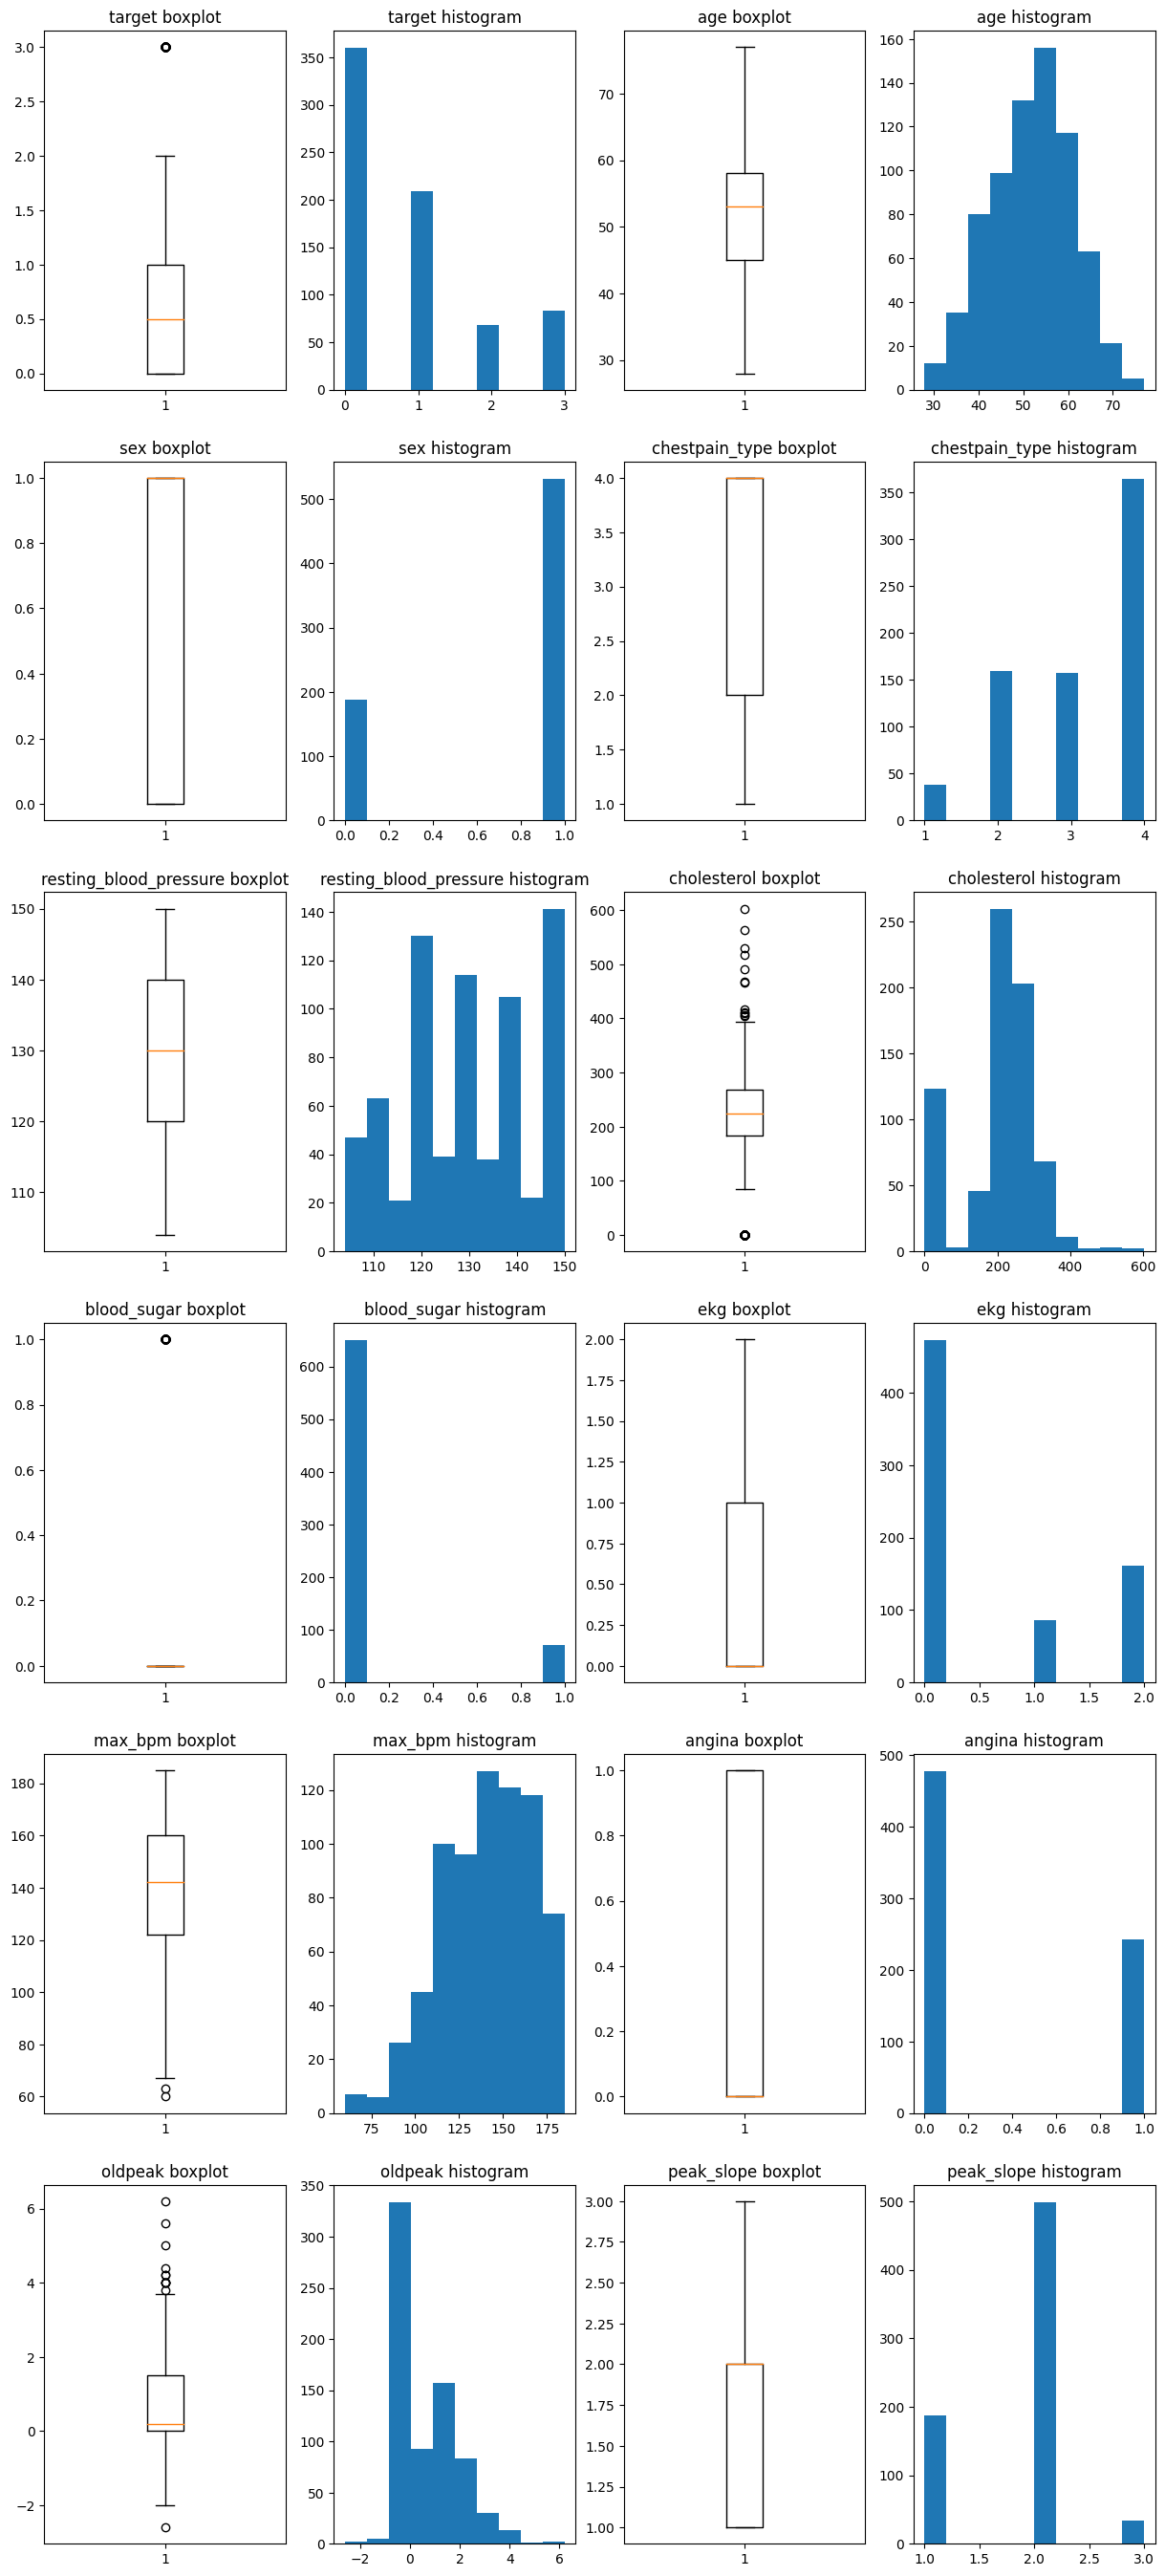

In [ ]:
df_wins = Winsorizer(wins_dict,cont_vars).fit_transform(df)
outliers_visual(df_wins)

### 4.2 Exploración de datos

#### Análisis univariado

In [ ]:
# Descriptores estadísticos para valores categóricos
# Convertir las columnas a tipo 'category'
for column in cat:
    df_wins[column] = df_wins[column].astype('category')

# Seleccionar las columnas categóricas específicas
categorical_df = df_wins[cat]
numeric_df = df_wins[cont]

# Descriptores estadísticos para valores continuos
categorical_df.describe(include='all')

,blood_sugar,angina,peak_slope,ekg
count,720.0,720.0,720.0,720.0
unique,2.0,2.0,3.0,3.0
top,0.0,0.0,2.0,0.0
freq,650.0,478.0,499.0,473.0


In [ ]:
# Descriptores estadísticos para valores continuos
numeric_df.describe()

,resting_blood_pressure,cholesterol,max_bpm,oldpeak
count,720.000000,720.000000,720.00000,720.000000
mean,130.051964,204.774749,140.47796,0.789636
std,14.161390,107.513156,25.44265,1.062500
min,104.000000,0.000000,60.00000,-2.600000
25%,120.000000,184.000000,122.00000,0.000000
50%,130.000000,225.000000,142.00000,0.200000
75%,140.000000,269.000000,160.00000,1.500000
max,150.000000,603.000000,185.00000,6.200000


In [ ]:
# Función para visualizar las distribuciones de las variables continuas
def visualize_distributions(df):
    cols = df.select_dtypes('number').columns
    val = int(len(cols)/2)+1
    plt.figure(figsize=(10, 15))
    for i, col in enumerate(cols, 1):
        plt.subplot(val, 4, i)
        plt.hist(df[col])
        plt.title(col)

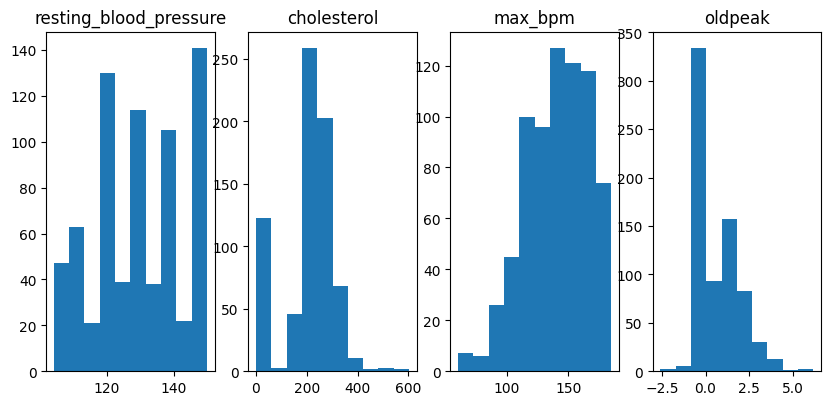

In [ ]:
# Visualizamos la distribución de las variables continuas
visualize_distributions(numeric_df)

Text(0.5, 0, 'blood_sugar')

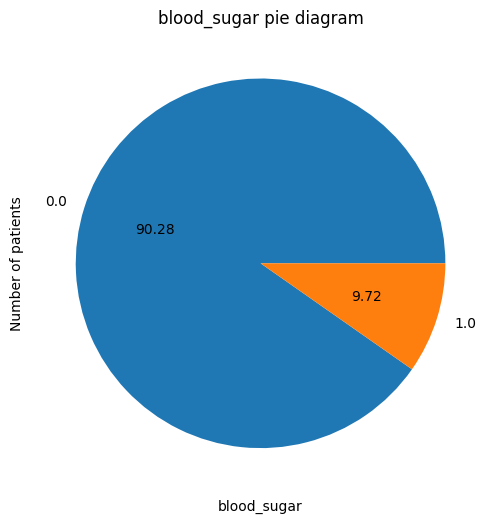

In [ ]:
df_wins['blood_sugar'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("blood_sugar pie diagram")
plt.ylabel('Number of patients')
plt.xlabel('blood_sugar')

Text(0.5, 0, 'sex')

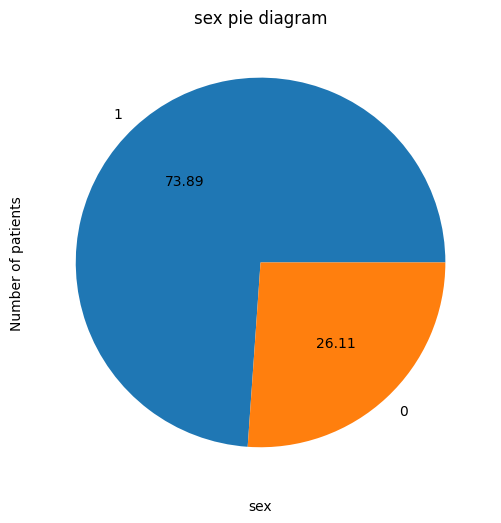

In [ ]:
df_wins['sex'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("sex pie diagram")
plt.ylabel('Number of patients')
plt.xlabel('sex')

Text(0.5, 0, 'angina')

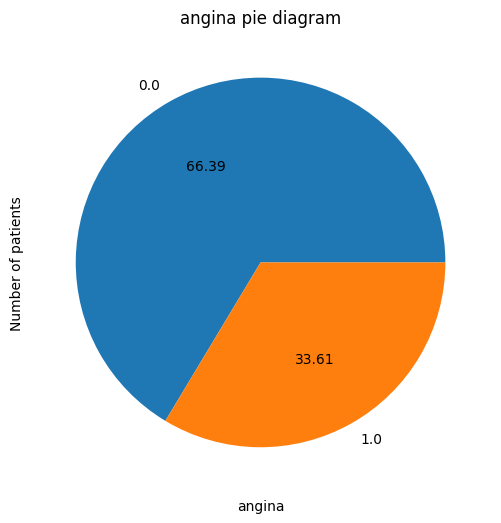

In [ ]:
df_wins['angina'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("angina pie diagram")
plt.ylabel('Number of patients')
plt.xlabel('angina')

Text(0.5, 0, 'peak_slope')

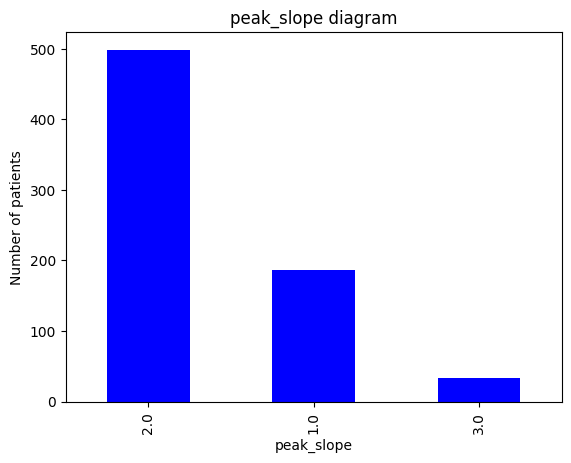

In [ ]:
df_wins['peak_slope'].value_counts().plot(kind='bar',color='blue')
plt.title("peak_slope diagram")
plt.ylabel('Number of patients')
plt.xlabel('peak_slope')


Text(0.5, 0, 'ekg')

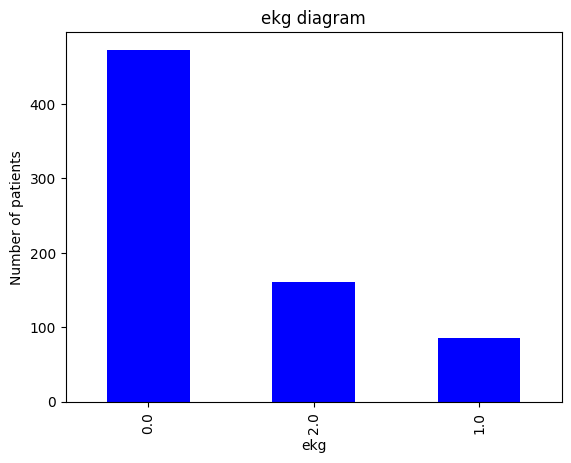

In [ ]:
df_wins['ekg'].value_counts().plot(kind='bar',color='blue')
plt.title("ekg diagram")
plt.ylabel('Number of patients')
plt.xlabel('ekg')

#falta resumen análisis

#### Análisis Bivariado

Haciendo uso del diagrama de cajas y bigotes obtendremos un resumen visual de la distribución de cada una de las variables independientes con respecto a la dependiente, observando así la distribución de los distintos grupos.

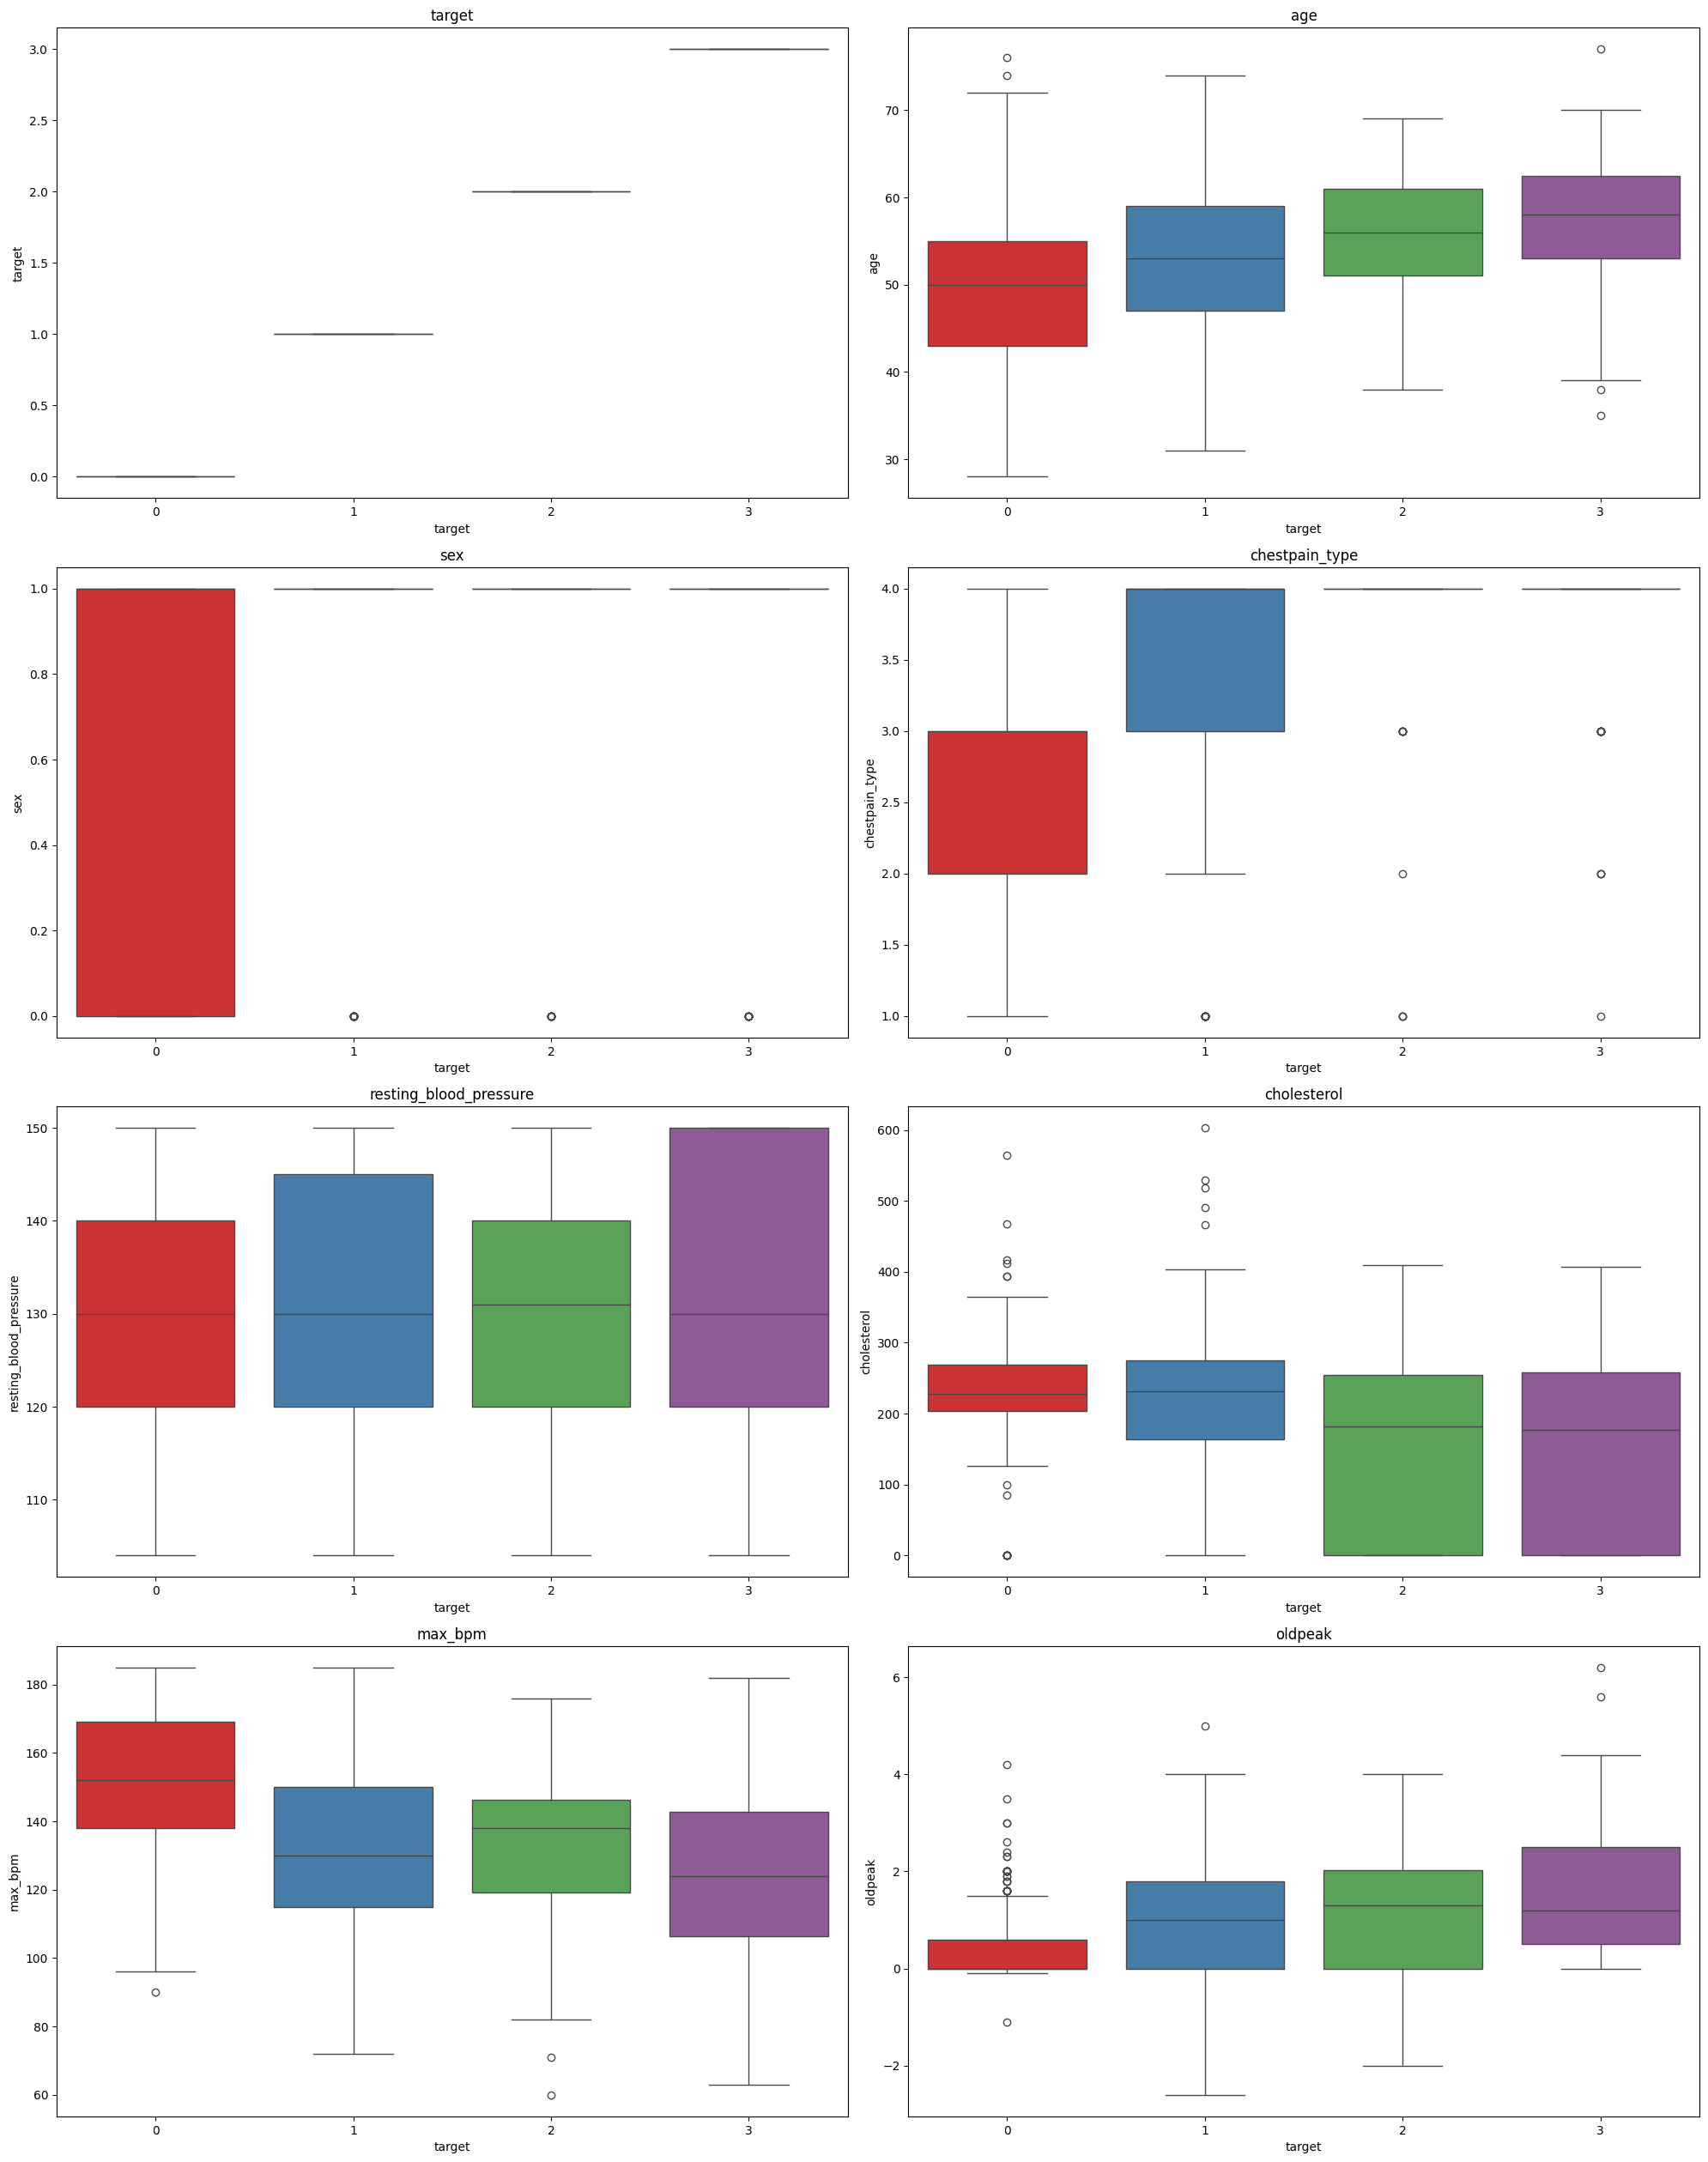

In [ ]:
fig = plt.figure(figsize=(20,50))
i=1

for var_num in df_wins.select_dtypes(include=['int64','float64']):
    ax = fig.add_subplot(8, 2, i)
    sns.boxplot(x=df_wins.columns[0], y=var_num, data=df_wins, palette='Set1')
    plt.title(var_num)
    i+=1
fig.tight_layout()

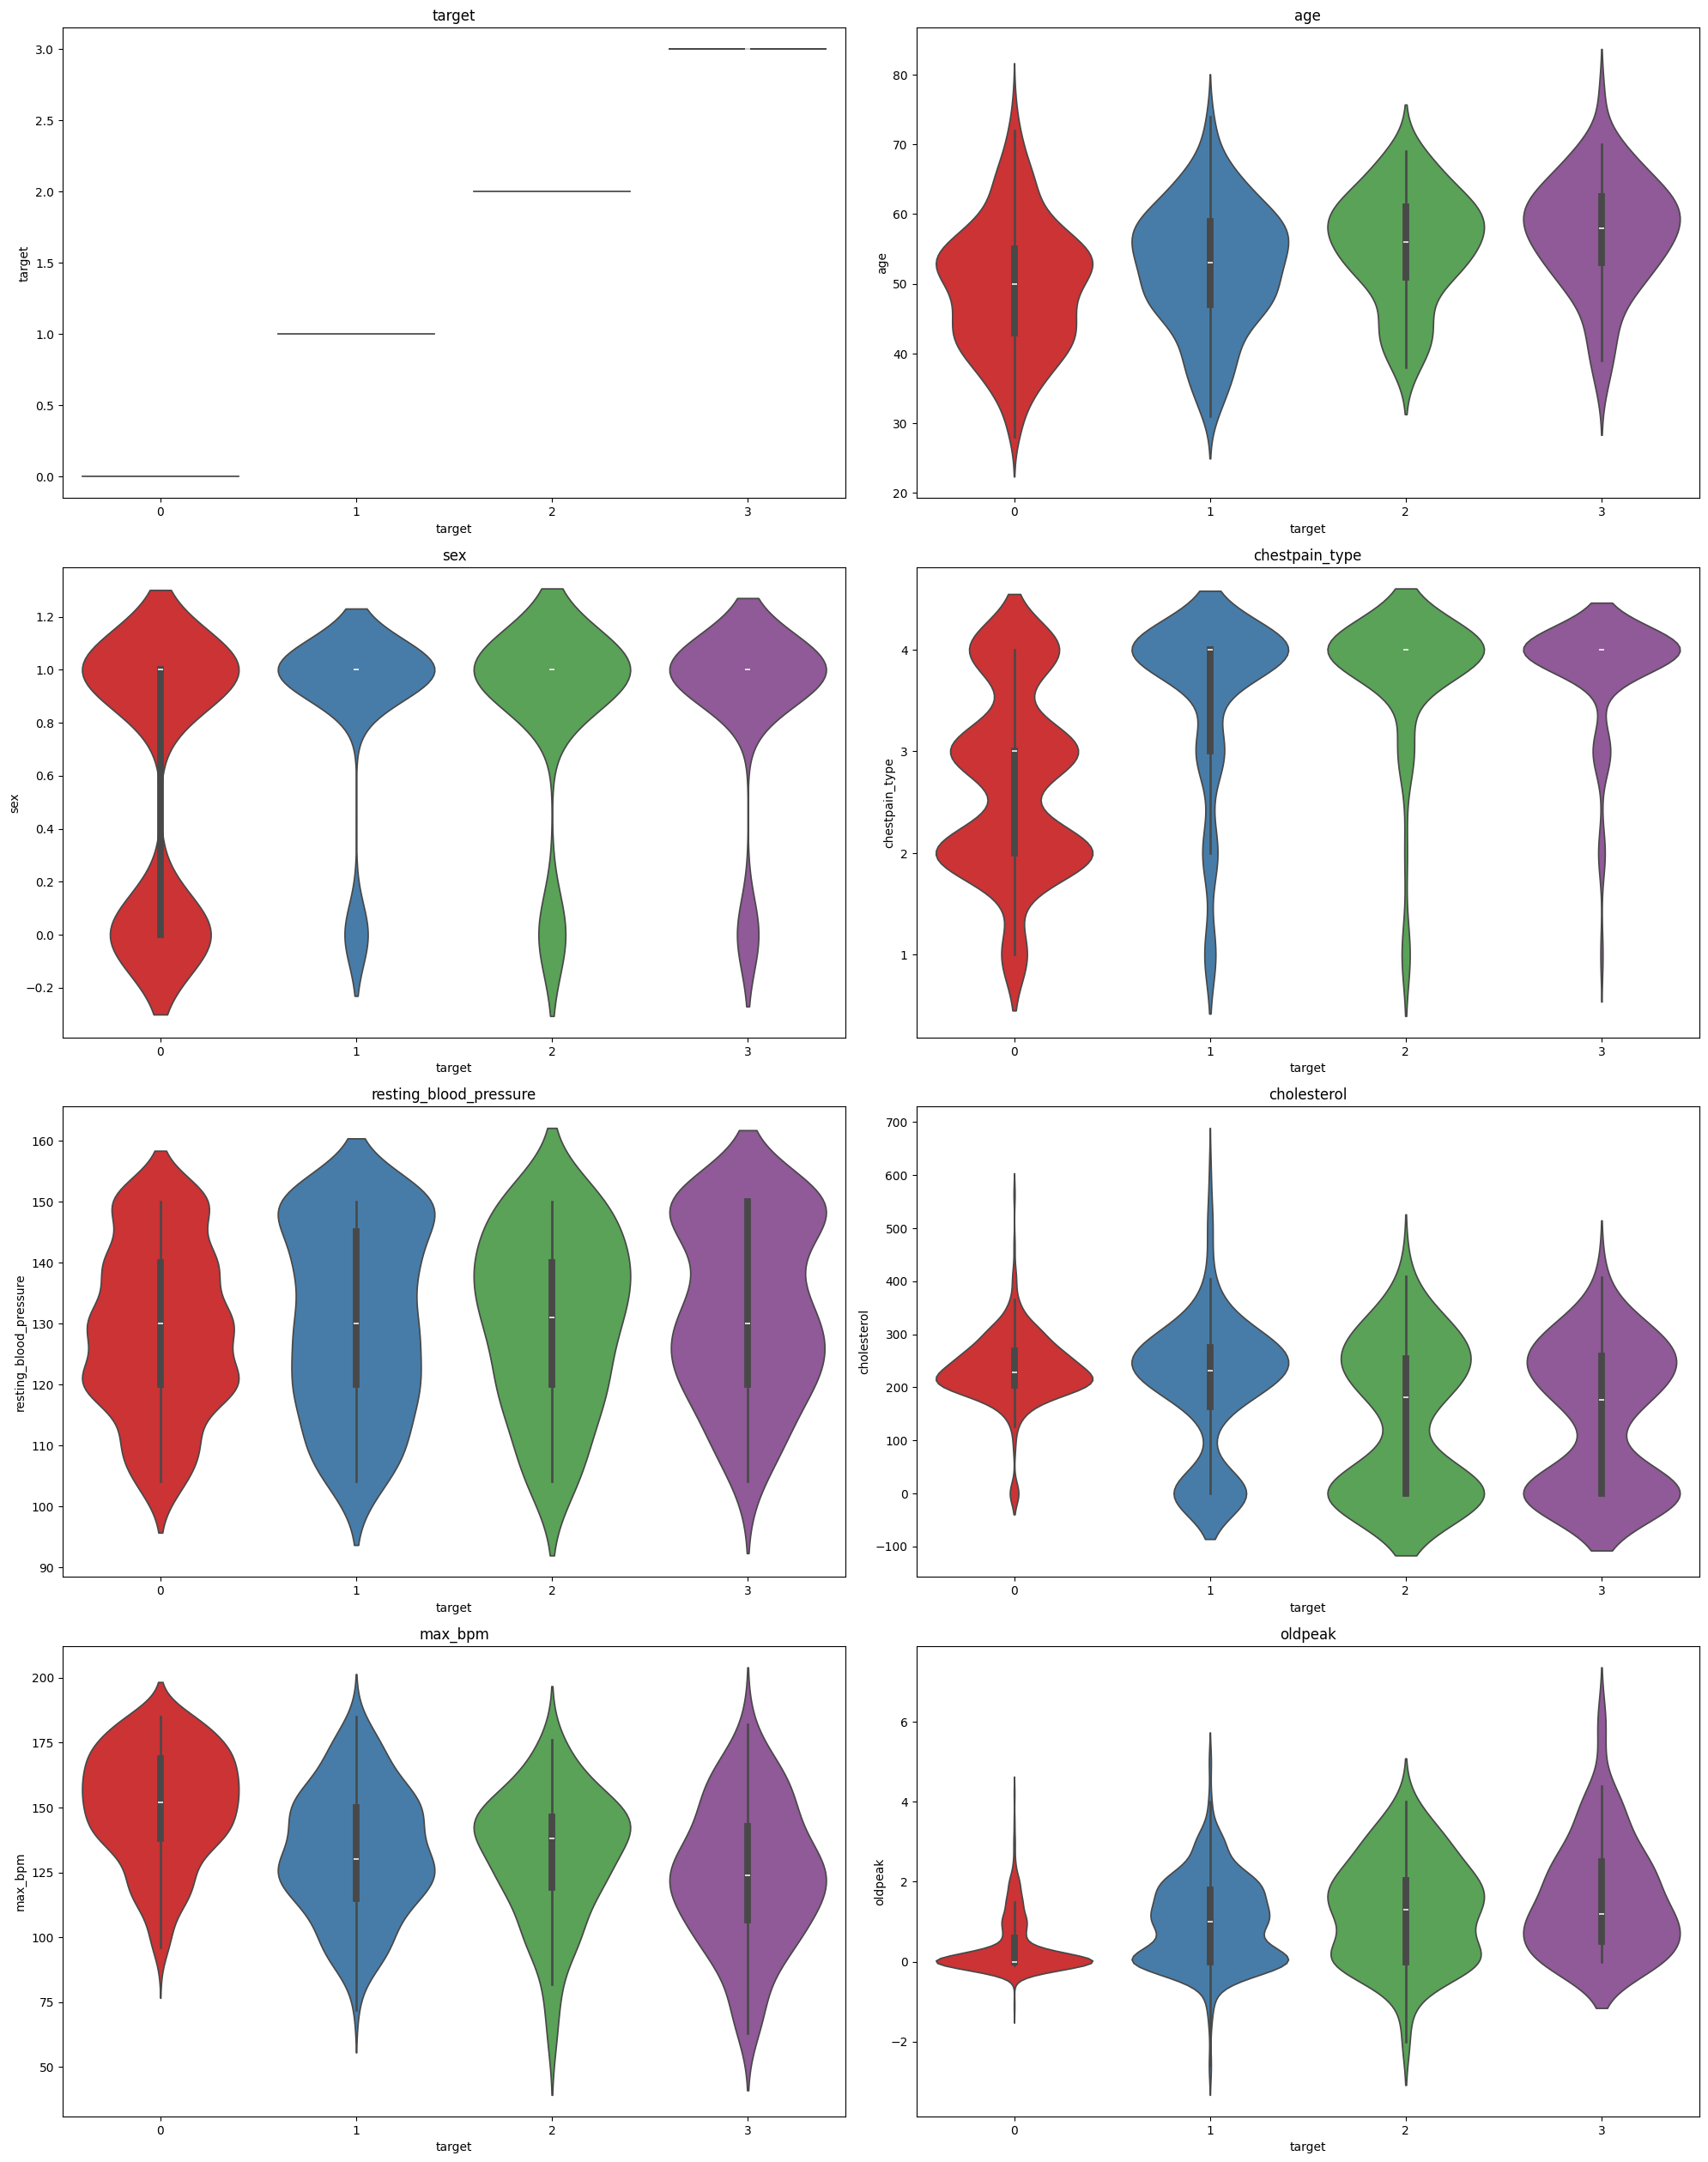

In [ ]:
fig = plt.figure(figsize=(20,50))
i=1

for var_num in df_wins.select_dtypes(include=['int64','float64']):
    ax = fig.add_subplot(8, 2, i)
    sns.violinplot(x=df_wins.columns[0], y=var_num, data=df_wins, palette='Set1')
    plt.title(var_num)
    i+=1
fig.tight_layout()

Vamos a ubicar los registros de acuerdo a su categoría, de manera que podamos dibujar nuestro diagrama de densidad

In [ ]:
def categories(df):
    target_var = {}
    target_var['Target o'] = df.loc[df.target == "0"]
    target_var['Target 1'] = df.loc[df.target == "1"]
    target_var['Target 2'] = df.loc[df.target == "2"]
    target_var['Target 3'] = df.loc[df.target == "3"]

    return target_var

Con el diagrama de densidad se puede observar aquellas variables independientes que mejor discriminan las clases de la variable objetivo.

In [ ]:
target_var = categories(df_wins)

i=1
fig = plt.figure(figsize=[20, 50])
for var_num in df_wins.select_dtypes('number').columns:
    ax = fig.add_subplot(8, 2, i)
    sns.kdeplot(target_var['Target o'][[var_num]].iloc[:,0], shade=True, color="b", label="Negative risk",palette='Set1')
    sns.kdeplot(target_var['Target 1'][[var_num]].iloc[:,0], shade=True, color="r", label="Neutral risk",palette='Set1')
    sns.kdeplot(target_var['Target 2'][[var_num]].iloc[:,0], shade=True, color="g", label="Risk = 1",palette='Set1')
    sns.kdeplot(target_var['Target 3'][[var_num]].iloc[:,0], shade=True, color="m", label="Risk = 2",palette='Set1')
    plt.legend()
    i+=1
fig.tight_layout()